# Intervalos de Confiança

Neste notebook, vamos aprender a calcular intervalos de confiança.

## Uma breve introdução

Embora intervalos de confiança sejam amplamente usados, pode ser difícil entender seu conceito e quando devemos usá-lo. Então vamos a um exemplo:

Suponha que você queira saber qual a porcentagem de pessoas nos Brasil que amam futebol. Para obter uma resposta 100% correta a essa pergunta, você deveria perguntar a cada um dos 212 milhões habitantes se eles amam ou não futebol. Obviamente, não é viável falar com 212 milhões de pessoas.

Você poderia então obter uma amostra aleatória de brasileiros (falando com muito menos pessoas) para obter a porcentagem de pessoas que amam futebol nessa amostra. Contudo, assim não estaria 100% confiante de que esse número está certo ou quão longe esse número está da resposta real.

Você poderia tentar obter um intervalo, como: “Tenho 95% de certeza que a porcentagem de pessoas que amam futebol nos EUA está entre 58% e 62%”. É daí que vem o nome Intervalo de confiança, temos um intervalo e temos alguma confiança sobre ele.

## Como calcular intervalos de confiança

O cálculo do intervalo de confiança (ou CI, Confidence Interval) envolve a melhor estimativa obtida pela amostra (média ou mediana) e uma margem de erro. A margem de erro é calculada usando o Z-score para a confiança desejada multiplicada pelo desvio padrão amostral da média.


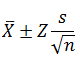




Em que image.png é a média amostral, Z é o valor de Z-score associado ao nível de confiança desejado, e image.png é o desvio padrão amostral da média.

Aqui estão os z-scores para os níveis de confiança mais comuns:

Confiança | Z

75%       | 1.15

90%       | 1.64

95%       | 1.96

99%       | 2.57

## Vamos ao código!

In [ ]:
import pandas as pd
import numpy as np

## Base de dados
Para este exercício, vamos utilizar uma base de dados do site [basedosdados.org](https://basedosdados.org), uma organização colaborativa que cataloga e divulga dados públicos brasileiros. Vocês podem usar esse site para buscar bases para projetos acadêmicos, sempre que necessitarem. Outro exemplo de site de reúne bases abertas (nesse caso, americanas) é o [UCI](https://archive.ics.uci.edu/ml/index.php).

Vamos usar a base de "Indicadores de Mobilidade e Transportes em 2010" para analisar os dados sobre tempo médio de deslocamento casa-trabalho para o ano de 2010.

Para usar o arquivo, podemos usar duas opções: (1)  baixar o csv e importá-lo (usando pandas), ou (2) usar diretamente o pacote do basededados.

### Opção 1:
Baixar a tabela 'tempo_deslocamento_casa_trabalho' em https://basedosdados.org/dataset/br-mobilidados-indicadores, adicionar em Files (menu da esquerda) e importar com pandas

In [ ]:
df = pd.read_csv("tempo_deslocamento_casa_trabalho.csv")

### Opção 2:
Instalar o pacote basedosdados, e importar a base diretamente. Mais detalhes em: https://basedosdados.github.io/mais/access_data_packages/#primeiros-passos.

Vocês terão que criar um projeto em https://console.cloud.google.com/projectselector2/home/dashboard?pli=1 para pegar o billing_project_id (ID do projeto)

In [ ]:
!pip install basedosdados
import basedosdados as bd
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_mobilidados_indicadores',
            table_id='tempo_deslocamento_casa_trabalho',\
            billing_project_id=<ID_PROJETO>)#colocar aqui o ID do projeto do gcloud
            #billing_project_id='censo-331617')


In [ ]:
df

,ano,sigla_uf,id_municipio,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,1100205,28,7.0
1,2010,AC,1200401,26,5.0
2,2010,PA,1202400,21,3.0
3,2010,PA,1206500,25,7.0
4,2010,AM,1302603,41,17.0
...,...,...,...,...,...
224,2010,GO,5220686,16,2.0
225,2010,GO,5221858,47,28.0
226,2010,GO,5222203,25,5.0
227,2010,GO,5222302,24,8.0


Antes de começarmos a análise, é importante explorar se há valores faltantes.

In [ ]:
df['tempo_medio_deslocamento'].isnull().sum()

0

Não há valores faltantes.

### Vamos calcular o intervalo de confiança para o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.

In [ ]:
## Primeiro, vamos calcular a media e o o desvio padrao
media_mg = np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])
std_mg = np.std(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])

print('O tempo médio de deslocamento no estado de MG é de', \
      np.round(media_mg,2), 'e o desvio padrão é de', np.round(std_mg,2))

O tempo médio de deslocamento no estado de MG é de 33.95 e o desvio padrão é de 10.49


In [ ]:
## Agora, voltando à tabela do Z-score, vemos que o valor de Z
##correspondente a um nível de confiança de 95% é de 1.96
## Assim, podemos calcular o intervalo de confiança:

z = 1.96
CI_inf_mg = media_mg - z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg = media_mg + z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))

In [ ]:
print('(', np.round(CI_inf_mg,2), ',',np.round(CI_sup_mg,2), ')')

( 30.61 , 37.28 )


## Exercício 1

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de MG, considerando um nível de confiança de 90%?

In [ ]:
# Confiacao 90% -> z = 1.64
z_90 = 1.64
CI_inf_mg_90 = media_mg - z_90*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg_90 = media_mg + z_90*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))

print('Intervalo de confianca: (', np.round(CI_inf_mg_90,2), ',',np.round(CI_sup_mg_90,2), ')')

Intervalo de confianca: ( 31.16 , 36.74 )


## Exercício 2

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [ ]:
## Primeiro, vamos calcular a media e o o desvio padrao para Sao Paulo
media_sp = np.mean(df.loc[df['sigla_uf']=='SP','tempo_medio_deslocamento'])
std_sp = np.std(df.loc[df['sigla_uf']=='SP','tempo_medio_deslocamento'])

print('O tempo médio de deslocamento no estado de SP é de', \
      np.round(media_sp,2), 'e o desvio padrão é de', np.round(std_sp,2))

## Agora, voltando à tabela do Z-score, vemos que o valor de Z
##correspondente a um nível de confiança de 95% é de 1.96
## Assim, podemos calcular o intervalo de confiança:

z_95 = 1.96
CI_inf_sp = media_sp - z_95*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='SP'])))
CI_sup_sp = media_sp + z_95*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='SP'])))

print('Intervalo de confianca: (', np.round(CI_inf_sp,2), ',',np.round(CI_sup_sp,2), ')')

O tempo médio de deslocamento no estado de SP é de 44.51 e o desvio padrão é de 8.33
Intervalo de confianca: ( 41.9 , 47.13 )


## Exercício 3

Qual é o CI do tempo **mediano** de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [ ]:
#Para mediana, deve-se usar o bootstrap

df_sp = df[df['sigla_uf']=='SP']
size = len(df_sp)
values = np.zeros(5000)

for i in range(5000):
      # replace=TRUE garanta amostras com reposição
      # random_state=i garante replicabilidade do experimento
      sample = df_sp.sample(size, replace=True, random_state=i)

      # Pode-se utilizar mediana
      values[i] = sample['tempo_medio_deslocamento'].median()

# Gerando valores inferior e superior para um nível de confiança de 95%
LI = np.percentile(values, 2.5)
LS = np.percentile(values, 97.5)

print('Intervalo de confianca: (', np.round(LI,2), ',',np.round(LS,2), ')')

Intervalo de confianca: ( 40.0 , 48.0 )


### Biblioteca scipy.stats

O módulo de funções estatísticas scipy stats nos permite calcular o CI chamando apenas uma função. Para maiores informações, ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

In [ ]:
import scipy.stats as st

#Voltando ao problema inicial, vamos calcular o intervalo de confiança para
#o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.
#alpha = nivel de confiança
#loc = array dos dados para media
#scale = desvio padrão amostral da média

ci = st.norm.interval(alpha=0.95, loc=np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento']), \
                      scale=st.sem(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'], \
                                   ddof=0, nan_policy='omit'))

In [ ]:
np.round(ci,2)

array([30.61, 37.28])

## Exercício 4

Usando a biblioteca scipy.stats, calcule e imprima o CI do tempo médio de deslocamento para cada estado brasileiro, com nível de confiança de 99% .

In [ ]:
#Dica: a função unique dá o array de todos os estados
df['sigla_uf'].unique()

array(['RO', 'AC', 'PA', 'AM', 'RR', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [ ]:
estados = df['sigla_uf'].unique()
estados_viaveis = []

for est in estados:
  ci = st.norm.interval(alpha=0.95, loc=np.mean(df.loc[df['sigla_uf']==est,'tempo_medio_deslocamento']), \
                      scale=st.sem(df.loc[df['sigla_uf']==est,'tempo_medio_deslocamento'], \
                                   ddof=0, nan_policy='omit'))
  valores = np.round(ci,2)
  print("Estado: ", est, "  -  Intervalo de Confianca: (", valores[0], ",",valores[1], ")" )

  if pd.isna(valores[0]) == False:
    estados_viaveis.append(est)

Estado:  RO   -  Intervalo de Confianca: ( nan , nan )
Estado:  AC   -  Intervalo de Confianca: ( nan , nan )
Estado:  PA   -  Intervalo de Confianca: ( 27.66 , 38.34 )
Estado:  AM   -  Intervalo de Confianca: ( nan , nan )
Estado:  RR   -  Intervalo de Confianca: ( nan , nan )
Estado:  AP   -  Intervalo de Confianca: ( nan , nan )
Estado:  TO   -  Intervalo de Confianca: ( nan , nan )
Estado:  MA   -  Intervalo de Confianca: ( nan , nan )
Estado:  PI   -  Intervalo de Confianca: ( nan , nan )
Estado:  CE   -  Intervalo de Confianca: ( 23.06 , 28.21 )
Estado:  RN   -  Intervalo de Confianca: ( nan , nan )
Estado:  PB   -  Intervalo de Confianca: ( nan , nan )
Estado:  PE   -  Intervalo de Confianca: ( 35.45 , 42.69 )
Estado:  AL   -  Intervalo de Confianca: ( nan , nan )
Estado:  SE   -  Intervalo de Confianca: ( nan , nan )
Estado:  BA   -  Intervalo de Confianca: ( 28.45 , 34.16 )
Estado:  MG   -  Intervalo de Confianca: ( 30.61 , 37.28 )
Estado:  ES   -  Intervalo de Confianca: ( na

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


## Exercício 5
Se não há valores valores, por que a função retorna NA para alguns estados?

A função retorna NA para alguns estados pois há somente um dado sobre ele ou todos os valores são iguais. Nesse caso o desvio padrão é zero e assim, o intervalo de confiança na verdade será a própria média. Isso contradiz a ideia de intervalo, sendo que por isso, a função retorna NA para esses estados. Exemplo com mais de uma instancia da cidade com o desvio igual a zero:

In [ ]:
df_exemplo = df[df['sigla_uf']=='RO']
df_exemplo.loc[1] = (["2014","RO", 1423234, 28, 7.0])
df_exemplo.loc[2] = (["2014","RO", 1236434, 28, 7.0])
df_exemplo.loc[3] = (["2004","RO", 1237544, 28, 7.0])
df_exemplo.loc[4] = (["2017","RO", 1238654, 28, 7.0])
df_exemplo

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ano,sigla_uf,id_municipio,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
0,2010,RO,1100205,28,7.0
1,2014,RO,1423234,28,7.0
2,2014,RO,1236434,28,7.0
3,2004,RO,1237544,28,7.0
4,2017,RO,1238654,28,7.0


In [ ]:
ci = st.norm.interval(alpha=0.95, loc=np.mean(df_exemplo.loc[df_exemplo['sigla_uf']=='RO','tempo_medio_deslocamento']), \
                      scale=st.sem(df_exemplo.loc[df_exemplo['sigla_uf']=='RO','tempo_medio_deslocamento'], \
                                   ddof=0, nan_policy='omit'))
ci

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


(nan, nan)

## Exercício 6

Crie uma visualização (a seu critério) para mostrar os intervalos de confiança dos estados com valores não nulos. Qual padrão você observa?

In [ ]:
import matplotlib.pyplot as plt
print(estados_viaveis)

['PA', 'CE', 'PE', 'BA', 'MG', 'RJ', 'SP', 'PR', 'GO']


In [ ]:
dados_boxplot = []
for estado in estados_viaveis:
  df_auxiliar = df[df['sigla_uf']==estado]
  size = len(df_auxiliar)
  values = np.zeros(5000)

  for i in range(5000):
        # replace=TRUE garanta amostras com reposição
        # random_state=i garante replicabilidade do experimento
        sample = df_auxiliar.sample(size, replace=True, random_state=i)

        # Pode-se utilizar media
        values[i] = sample['tempo_medio_deslocamento'].mean()

  dados_boxplot.append(values)

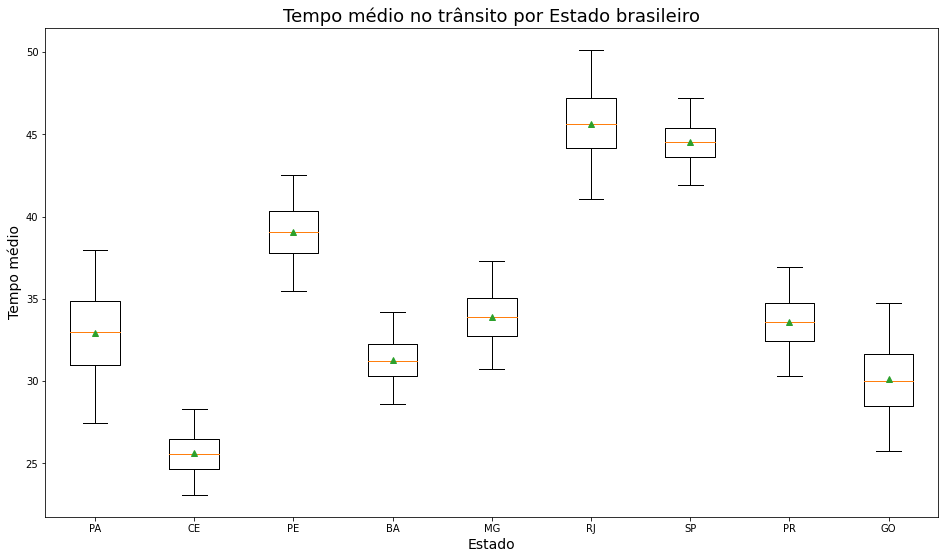

In [ ]:
plt.rcParams['figure.figsize']  = (16, 9)
plt.boxplot(dados_boxplot, whis=[2.5, 97.5], positions= [1,2,3,4,5,6,7,8,9], showfliers=False, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9], ['PA', 'CE', 'PE', 'BA', 'MG', 'RJ', 'SP', 'PR', 'GO'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Tempo médio', fontsize=14)
plt.title('Tempo médio no trânsito por Estado brasileiro', fontsize=18)
plt.show()

É possível perceber que o tempo médio no trânsito é maior nos estados em que se concentra muita parte da população brasileira, como São Paulo e Rio de Janeiro.